In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

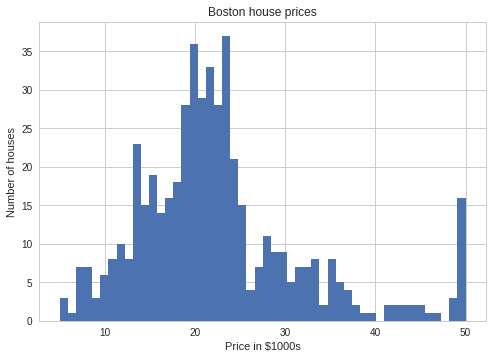

In [7]:
plt.hist(boston.target, bins=50)
plt.xlabel("Price in $1000s")
plt.ylabel("Number of houses")
plt.title("Boston house prices")
plt.show()

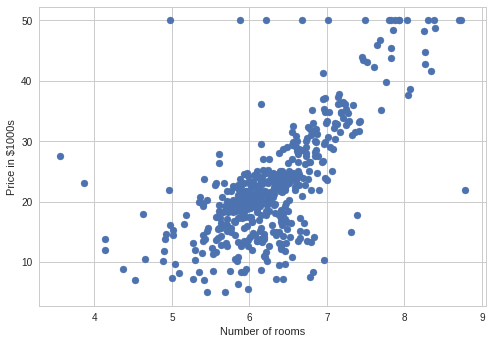

In [8]:
plt.scatter(boston.data[:,5], boston.target)

plt.xlabel("Number of rooms")
plt.ylabel("Price in $1000s")
plt.show()

In [9]:
boston_df = pd.DataFrame(boston.data)

In [10]:
boston_df.columns = boston.feature_names

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston_df["Price"] = boston.target

In [13]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


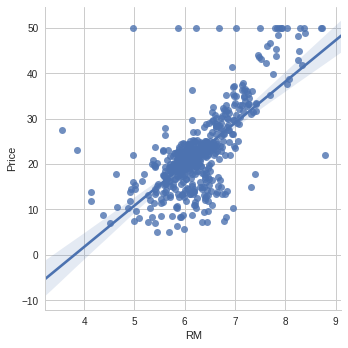

In [14]:
sns.lmplot("RM", "Price", data=boston_df)
plt.show()

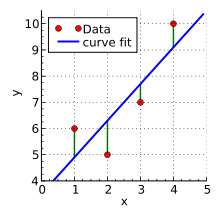

In [15]:
from IPython.display import Image
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png"
Image(url)

We are labelling each green line (distance between the best fit line and the co-ordinate) as having a distance D

## Using Numpy for a Univariate Linear Regression

Numpy has a built in Least Squared method in its linear algebra library. We will use this first for our Univariate (single variable) regression and then move on to scikit learn for our multi variate regression.

In [16]:
X = boston_df.RM
X.shape
# X outputs like a series

(506,)

In [17]:
# We need to convert this (count, number of attributes) inorder to use numpy linear library
X = np.vstack(X)
print(X.shape)
# X Outputs like [[6.575], [6.421]....]

(506, 1)


In [18]:
Y = boston_df.Price

Now that we have our X and Y, let's use numpy single variable linear regression

We know that the equation of a line is: <i>y = mx + c</i>

Which we can rewrite using matrices as: <i>y = Ap</i>

Where, A = [x, 1]

and p = [m]<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| |<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[c]

In [19]:
# We will have to create X in the form like: [X 1] to fit in our equation variable A, right now X is like [X]
X = np.array([ [value, 1] for value in X ])
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [20]:
m, c = np.linalg.lstsq(X, Y)[0]

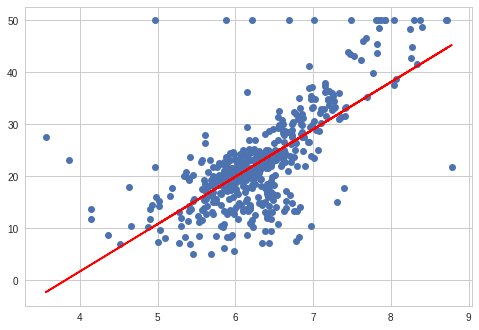

In [21]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM
plt.plot(x, m * x + c, 'r', label="Best Fit Line")

plt.show()

### RMSE (Root Mean Squared Error):


In [22]:
# Get the resulting array
result = np.linalg.lstsq(X, Y)

# Get the total error
error_total = result[1]

# Get the roor mean squared error
rmse = np.sqrt( error_total/len(X) )

print ("The Root Mean Squared Error is %.2f " %rmse)

The Root Mean Squared Error is 6.60 


## Using scikit learn to implement a multivariate regression

In [23]:
# Import for Linear regression
from sklearn.linear_model import LinearRegression

In [24]:
# Create a linear regression object
lreg = LinearRegression()

In [25]:
X_multi = boston_df.drop("Price", 1)

Y_target = boston_df.Price

In [26]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print("The estimated intercept coefficient is: %.2f" %lreg.intercept_)

The estimated intercept coefficient is: 36.49


In [28]:
print("The number of coefficients used was %d" %len(lreg.coef_))

The number of coefficients used was 13
